In [8]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('clinical-data-for Alzheimers.csv')

In [4]:
data.head()

,Subject,Gender,mmse,ageAtEntry,X,Y,P,Az,Al,target
0,OAS30124,female,16,79.14579,1.0,1.0,1.0,1.0,1.0,AD Dementia
1,OAS30124,female,21,79.14579,0.5,0.5,0.5,0.5,0.5,AD Dementia
2,OAS31129,female,20,68.07666,1.0,1.0,1.0,1.0,1.0,AD Dementia
3,OAS31129,female,28,68.07666,1.0,1.0,1.0,1.0,1.0,AD Dementia
4,OAS31129,female,29,68.07666,0.5,0.5,0.5,0.5,0.5,AD Dementia


In [5]:
data.describe()

,mmse,ageAtEntry,X,Y,P,Az,Al
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,25.344167,72.944759,0.696250,0.780417,0.696250,0.780417,0.780417
std,4.392432,7.703531,0.405378,0.484015,0.405378,0.484015,0.484015
min,0.000000,47.605750,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,67.602329,0.500000,0.500000,0.500000,0.500000,0.500000
50%,26.000000,73.013010,0.500000,0.500000,0.500000,0.500000,0.500000
75%,29.000000,78.718688,1.000000,1.000000,1.000000,1.000000,1.000000
max,30.000000,95.567420,3.000000,3.000000,3.000000,3.000000,3.000000


<AxesSubplot:>

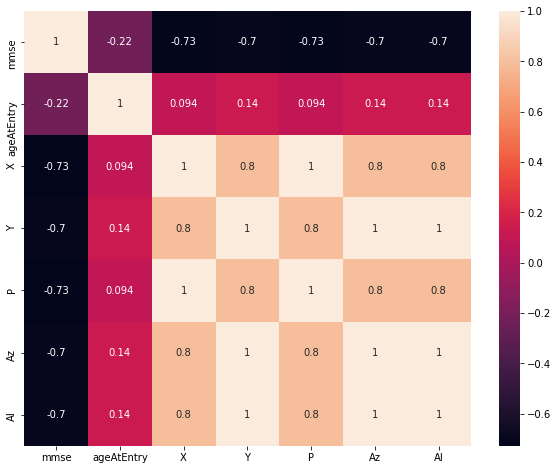

In [6]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [7]:
np.shape(data)

(1200, 10)

<AxesSubplot:xlabel='target', ylabel='count'>

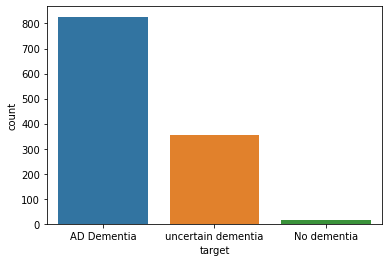

In [8]:
sns.countplot(x=data.target)

In [9]:
#set plot features
sns.set(style = 'darkgrid', color_codes = True) 
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)

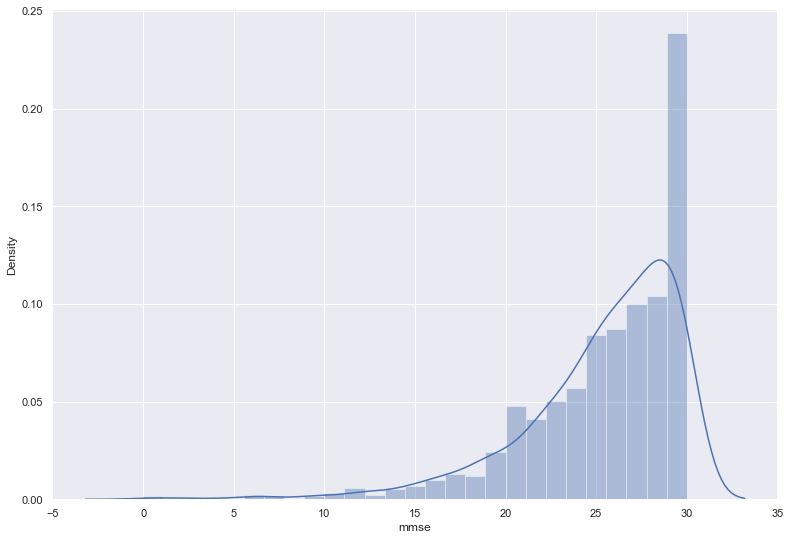

In [10]:
#create plot, a histogram of cost of living index
setPlt()
hist = sns.distplot(data['mmse'])

In [11]:
data['ageAtEntry'] = data['ageAtEntry'].astype(int)

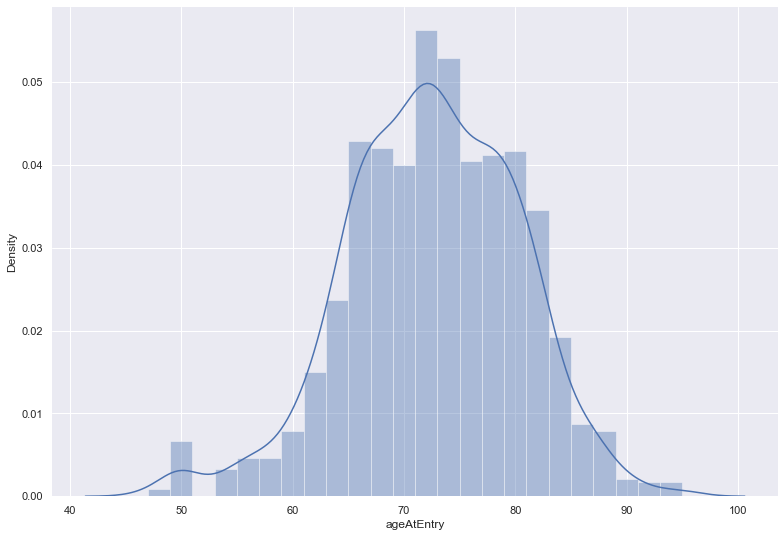

In [12]:
setPlt()
hist = sns.distplot(data['ageAtEntry'])


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject     1200 non-null   object 
 1   Gender      1200 non-null   object 
 2   mmse        1200 non-null   int64  
 3   ageAtEntry  1200 non-null   int32  
 4   X           1200 non-null   float64
 5   Y           1200 non-null   float64
 6   P           1200 non-null   float64
 7   Az          1200 non-null   float64
 8   Al          1200 non-null   float64
 9   target      1200 non-null   object 
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 89.2+ KB


In [14]:
data.shape

(1200, 10)

In [15]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['target']= label_encoder.fit_transform(data['target'])

data['Gender'].unique()
data['target'].unique()

array([0, 2, 1])

# Feature Selection

In [16]:
X = data.iloc[:, 1:9]
y = data.iloc[:,9]

In [17]:
X

,Gender,mmse,ageAtEntry,X,Y,P,Az,Al
0,0,16,79,1.0,1.0,1.0,1.0,1.0
1,0,21,79,0.5,0.5,0.5,0.5,0.5
2,0,20,68,1.0,1.0,1.0,1.0,1.0
3,0,28,68,1.0,1.0,1.0,1.0,1.0
4,0,29,68,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...
1195,1,22,68,1.0,1.0,1.0,1.0,1.0
1196,1,16,68,1.0,1.0,1.0,1.0,1.0
1197,1,28,67,0.5,0.5,0.5,0.5,0.5
1198,0,17,80,1.0,1.0,1.0,1.0,1.0


In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    2
Name: target, Length: 1200, dtype: int32

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Voting Classifier

In [20]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=5, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Voting Classifier: 
[[772   0  55]
 [  0  17   0]
 [ 90   0 266]]


In [21]:
val5 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Voting: ", val5, "\n")

*Accuracy score for Voting:  87.91666666666667 



In [22]:
confusion = confusion_matrix(y, predictions)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]

from sklearn import metrics
vot_sensitivity = ((TP / float(FN + TP))) * 100

print(vot_sensitivity)
vot_specificity = ((TN / (TN + FP))) * 100

print(vot_specificity)

100.0
100.0


# Deep Learning

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

Using TensorFlow backend.


In [24]:
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

For CNN

In [25]:
X

,Gender,mmse,ageAtEntry,X,Y,P,Az,Al
0,0,16,79,1.0,1.0,1.0,1.0,1.0
1,0,21,79,0.5,0.5,0.5,0.5,0.5
2,0,20,68,1.0,1.0,1.0,1.0,1.0
3,0,28,68,1.0,1.0,1.0,1.0,1.0
4,0,29,68,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...
1195,1,22,68,1.0,1.0,1.0,1.0,1.0
1196,1,16,68,1.0,1.0,1.0,1.0,1.0
1197,1,28,67,0.5,0.5,0.5,0.5,0.5
1198,0,17,80,1.0,1.0,1.0,1.0,1.0


In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    2
Name: target, Length: 1200, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
X_train = X_train.values
X_test = X_test.values
X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

In [29]:
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

# CNN

In [30]:
verbose, epoch, batch_size = 1, 100, 32
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    #cnnmodel.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
    #cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(3, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 128)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                24640     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9

In [31]:
modelhistory= cnnmodel.fit(X_train, Y_train, epochs=20,steps_per_epoch=2, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Train on 720 samples, validate on 180 samples
Epoch 1/20
 32/720 [>.............................] - ETA: 0s - loss: 0.7600 - accuracy: 0.6250

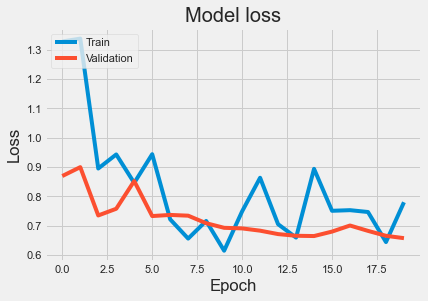

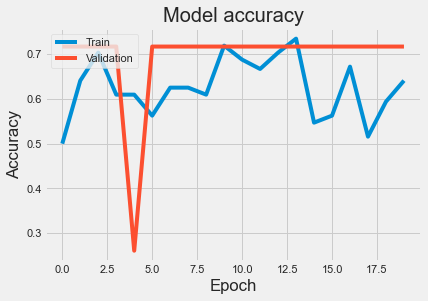

In [32]:
# Plot training & validation loss values
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [33]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(Y_test,axis=1)

acc_cnn = accuracy_score(cnn_actual_value, cnn_predict) * 100
confusion = confusion_matrix(cnn_actual_value, cnn_predict)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]

from sklearn import metrics
cnn_sensitivity = ((TP / float(FN + TP))) * 100

print(cnn_sensitivity)
cnn_specificity = ((TN / (TN + FP))) * 100

print(cnn_specificity)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

98.13084112149532
nan


# BiLSTM

In [34]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM, Bidirectional,SimpleRNN

In [35]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(Bidirectional(LSTM(13,input_shape=(8,1))))
model.add(Dense(units=3))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,Y_train,epochs=10,batch_size=1,verbose=1,callbacks=[es])

Train on 900 samples
Epoch 1/10
900/900 [==============================] - 10s 11ms/sample - loss: 0.6578 - accuracy: 0.6767
Epoch 2/10
900/900 [==============================] - 6s 6ms/sample - loss: 0.4799 - accuracy: 0.7067
Epoch 3/10
900/900 [==============================] - 4s 5ms/sample - loss: 0.4583 - accuracy: 0.6867
Epoch 4/10
900/900 [==============================] - 6s 7ms/sample - loss: 0.4485 - accuracy: 0.7200
Epoch 5/10
900/900 [==============================] - 4s 5ms/sample - loss: 0.4444 - accuracy: 0.7189
Epoch 6/10
900/900 [==============================] - 7s 8ms/sample - loss: 0.4406 - accuracy: 0.7300
Epoch 7/10
900/900 [==============================] - 5s 6ms/sample - loss: 0.4414 - accuracy: 0.7122
Epoch 8/10
900/900 [==============================] - 7s 8ms/sample - loss: 0.4407 - accuracy: 0.7156
Epoch 9/10
900/900 [==============================] - 6s 6ms/sample - loss: 0.4373 - accuracy: 0.7200
Epoch 10/10
900/900 [==============================] - 7s 8

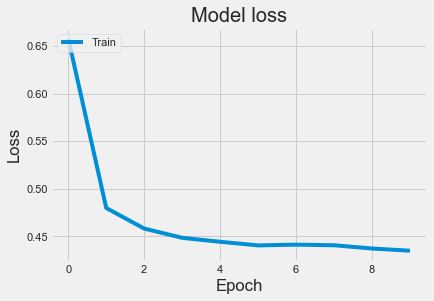

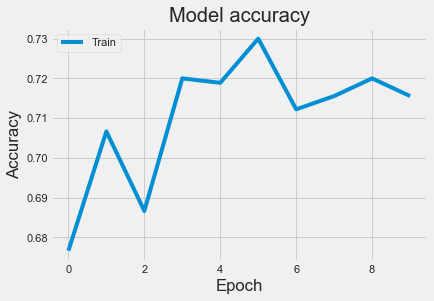

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [37]:
bilstm = history.history['accuracy']
bilstm = bilstm[9]

# RC - RNN

In [38]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(SimpleRNN(13,input_shape=(8,1)))
model.add(Dense(units=3))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,Y_train,epochs=10,batch_size=1,verbose=1,callbacks=[es])

Train on 900 samples
Epoch 1/10
900/900 [==============================] - 6s 7ms/sample - loss: 0.6107 - accuracy: 0.6922
Epoch 2/10
900/900 [==============================] - 4s 4ms/sample - loss: 0.4831 - accuracy: 0.7033
Epoch 3/10
900/900 [==============================] - 3s 4ms/sample - loss: 0.4595 - accuracy: 0.7022
Epoch 4/10
900/900 [==============================] - 4s 4ms/sample - loss: 0.4502 - accuracy: 0.7000
Epoch 5/10
900/900 [==============================] - 5s 6ms/sample - loss: 0.4470 - accuracy: 0.7022
Epoch 6/10
900/900 [==============================] - 4s 4ms/sample - loss: 0.4443 - accuracy: 0.6967
Epoch 7/10
900/900 [==============================] - 3s 3ms/sample - loss: 0.4434 - accuracy: 0.7133
Epoch 8/10
900/900 [==============================] - 6s 6ms/sample - loss: 0.4408 - accuracy: 0.7044
Epoch 9/10
900/900 [==============================] - 4s 4ms/sample - loss: 0.4436 - accuracy: 0.7144
Epoch 10/10
900/900 [==============================] - 3s 4ms

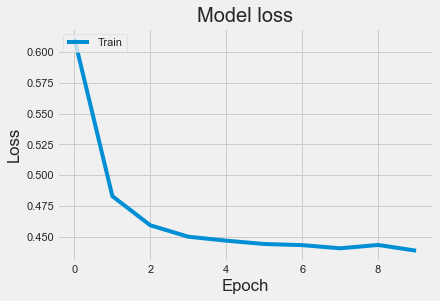

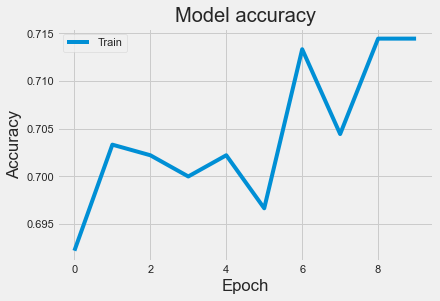

In [39]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [40]:
rc = history.history['accuracy']
rc = rc[9]

# Accuracy Comparison

In [41]:
score = [val5,acc_cnn,bilstm*100,rc*100]

In [42]:
#make variabel for save the result and to show it
classifier = ('Voting','CNN','BiLSTM','RC-RNN')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3]
[87.91666666666667, 70.0, 71.55555486679077, 71.44444584846497]


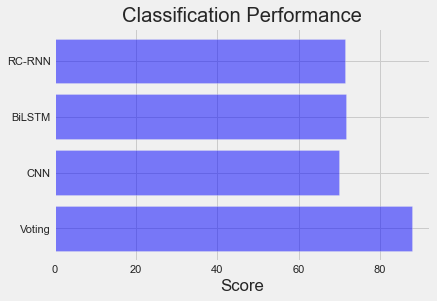

In [43]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()